<center>
    <h1><font size="16">Especialización en Estadística</font></h1>
    <h1><font size="12">SERIES DE TIEMPO</font></h1>
</center>

<h2>🎓 Taller Práctico – Estacionariedad, Diferenciación y Autocorrelación</h2>

<h3>🎯 **Objetivo del taller**</h3>

Guiar al estudiante en la **identificación de la no estacionariedad** en una serie temporal real, mediante el análisis gráfico, pruebas estadísticas y transformaciones básicas (logaritmo y diferenciación), y familiarizarlo con el uso e interpretación de las funciones de **autocorrelación (ACF)** y **autocorrelación parcial (PACF)** como herramientas para el diagnóstico preliminar de modelos ARIMA.

**📊 Análisis de la serie `AirPassengers`**

---

<h3>📦 Requisitos previos</h3>

In [1]:
# Cargar paquetes necesarios

library(fpp3)      # Framework moderno para series de tiempo:
                   # incluye tsibble (estructura de series),
                   # funciones de modelado (ARIMA, ETS),
                   # autoplot() para visualización rápida.

library(tseries)   # Incluye la prueba de raíz unitaria Augmented Dickey-Fuller (adf.test),
                   # útil para evaluar estacionariedad de series.

library(forecast)  # Paquete tradicional con funciones como auto.arima, hw, ets,
                   # y visualización con ggAcf y ggPacf.

library(ggplot2)   # Sistema de gráficos de R. Se usa como base para visualizaciones
                   # personalizadas y para complementar autoplot.

library(ggpubr)    # Facilita la disposición de múltiples gráficos en una sola figura,
                   # por ejemplo con ggarrange().


Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────── fpp3 1.0.1 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.6
✔ dplyr       1.1.4     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.1     ✔ feasts      0.4.1
✔ lubridate   1.9.4     ✔ fable       0.4.1
✔ ggplot2     3.5.1     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Adjuntando el paquete: 'ggpubr'


T

<h3>🛠 Paso 1: Cargar y visualizar la serie original</h3>

Plot variable not specified, automatically selected `.vars = value`


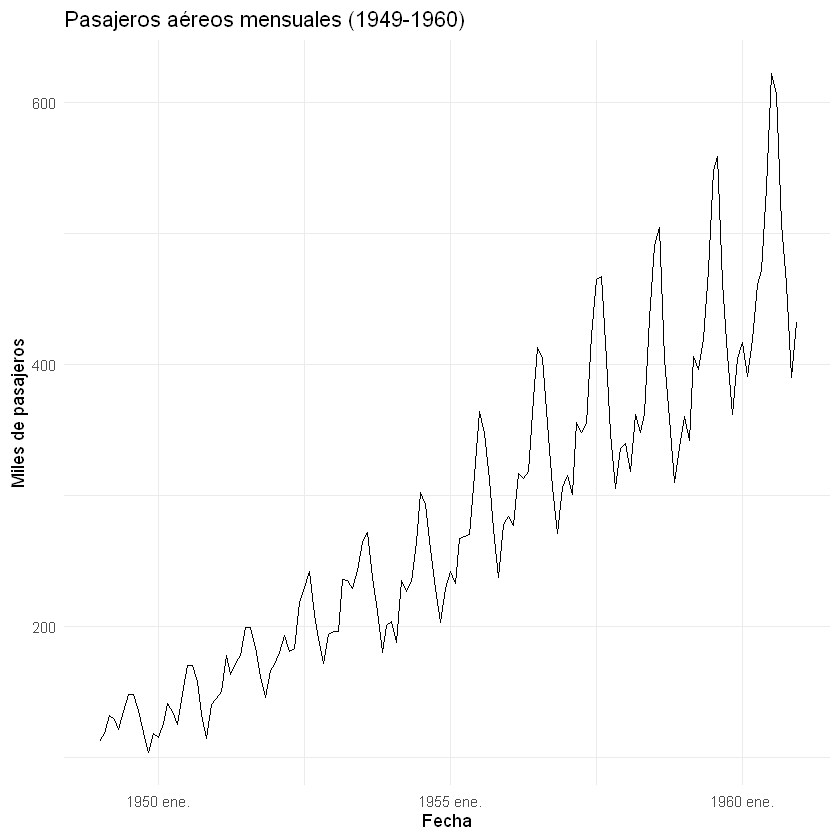

In [2]:
# Convertir a tsibble
ap <- as_tsibble(AirPassengers)

# Visualizar
autoplot(ap) +
  labs(
    title = "Pasajeros aéreos mensuales (1949-1960)",
    y = "Miles de pasajeros",
    x = "Fecha"
  ) +
  theme_minimal()


📌 **Preguntas:**
- ¿Observas una tendencia creciente?
- ¿Notas estacionalidad? ¿Cómo se manifiesta?
- ¿La variabilidad parece constante o creciente?

---

<h3>🛠 Paso 2: Evaluación formal de estacionariedad (ADF test)</h3>

In [3]:
adf.test(AirPassengers)

Warning message in adf.test(AirPassengers):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  AirPassengers
Dickey-Fuller = -7.3186, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


📌 **Indicaciones:**
- La **hipótesis nula** es que la serie tiene **raíz unitaria** → es **no estacionaria**.
- Observa el **p-valor** para tomar una decisión.

**✅ Interpretación**
- El valor del estadístico de prueba es -7.3186, lo cual es suficientemente bajo como para rechazar la hipótesis nula.
- El p-valor = 0.01 indica que, al nivel de significancia del 5%, se rechaza la hipótesis nula de raíz unitaria (si $\alpha = 0.01$ estaríamos ante la misma decición ya que, según indica el software, el p-valor es mucho más pequeño que 0.01).
- Por lo tanto, el test sugiere que la serie es estacionaria.
- Aunque el p-valor sugiere **rechazar la hipótesis nula de raíz unitaria**, el resultado **no es confiable en este caso por varias razones**:

**🚨 Razones para cuestionar el resultado**
1. **Violación de supuestos del ADF**:
   - La prueba **no es robusta ante estacionalidad** (`AirPassengers` es estacional).
   - No se han aplicado **transformaciones previas (como logaritmo o diferenciación)** necesarias para estabilizar la varianza y eliminar tendencia.
2. **Falsos negativos posibles**:
   - Las pruebas de raíz unitaria como ADF pueden indicar **falsamente estacionariedad** cuando hay **estacionalidad fuerte** o **tendencia determinística**.

3. **Análisis gráfico lo contradice**:
   - El gráfico de la serie muestra **tendencia creciente clara** y **varianza creciente**, típico de una serie **no estacionaria**.

**✅ ¿Qué hacer?**

En la práctica, **se recomienda aplicar transformaciones** antes de correr la prueba:

1. **Logaritmo** para estabilizar la varianza.
2. **Diferenciación** para remover tendencia.
3. Luego, aplicar `adf.test()` sobre la serie transformada.

<h3>🛠 Paso 3: Aplicar transformación logarítmica y diferenciación</h3>

Plot variable not specified, automatically selected `.vars = value`


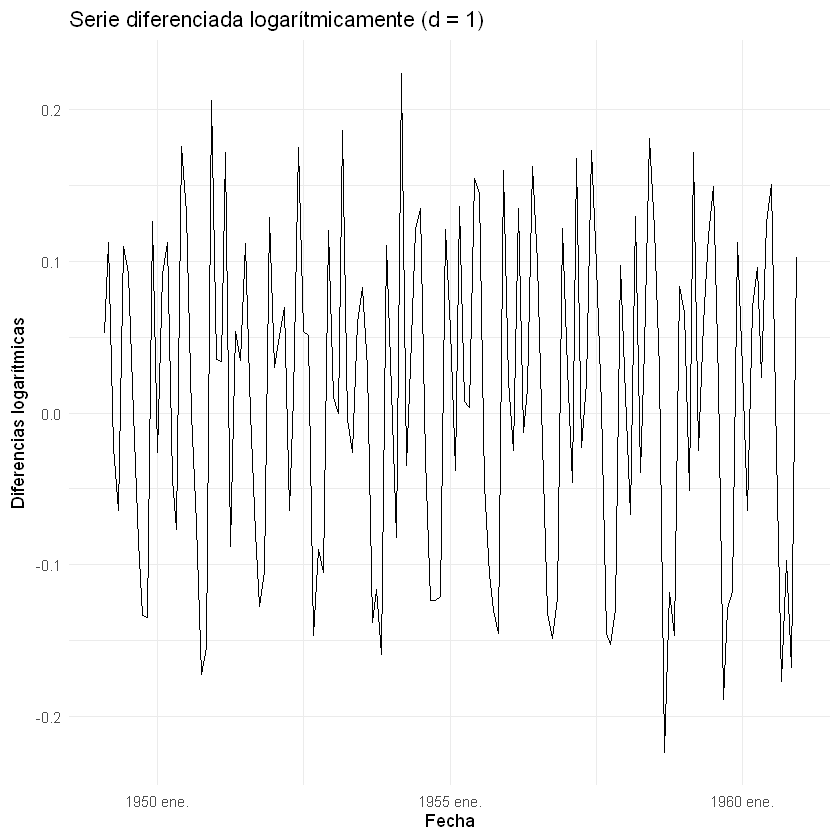

In [4]:
# Diferenciación logarítmica (común en modelos multiplicativos)
diff_log_ap <- diff(log(AirPassengers))

# Visualizar la serie transformada
autoplot(as_tsibble(diff_log_ap)) +
  labs(
    title = "Serie diferenciada logarítmicamente (d = 1)",
    y = "Diferencias logarítmicas",
    x = "Fecha"
  ) +
  theme_minimal()

📌 **Preguntas:**
- ¿La serie transformada parece más estacionaria?
- ¿Persiste la estacionalidad?

---

<h3>🛠 Paso 4: Prueba de estacionariedad sobre la serie diferenciada</h3>

In [5]:
adf.test(diff_log_ap)

Warning message in adf.test(diff_log_ap):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff_log_ap
Dickey-Fuller = -6.4313, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


📌 **Indicaciones:**
- Si ahora se rechaza la hipótesis nula (p-valor < 0.05), entonces la serie **sí es estacionaria** tras la transformación.

**✅ Interpretación**

- El **estadístico ADF = -6.4313** y el **p-valor < 0.01** (mensaje de advertencia indica que es menor a la precisión impresa).
- Se **rechaza la hipótesis nula** de presencia de raíz unitaria.
- La serie **diferenciada y transformada con logaritmo** puede considerarse **estacionaria**.
- Esto valida que las transformaciones aplicadas (log + diff) fueron adecuadas para preparar la serie antes de identificar el modelo ARIMA.


<h3>🛠 Paso 5: Funciones de autocorrelación y autocorrelación parcial</h3>

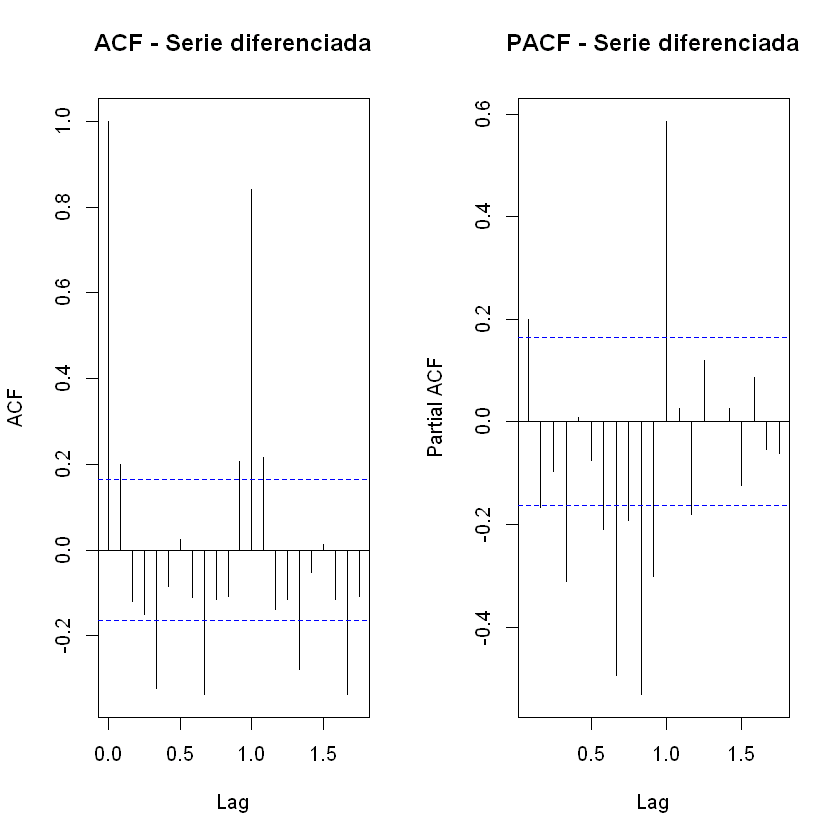

In [6]:
par(mfrow = c(1, 2))
acf(diff_log_ap, main = "ACF - Serie diferenciada")
pacf(diff_log_ap, main = "PACF - Serie diferenciada")

📌 **Preguntas para discusión:**
1. ¿Dónde se corta la ACF? ¿Y la PACF?
2. ¿Puedes deducir valores tentativos para $p$ (AR) y $q$ (MA)?
3. ¿Hay signos de autocorrelación estacional (cada 12 meses)?

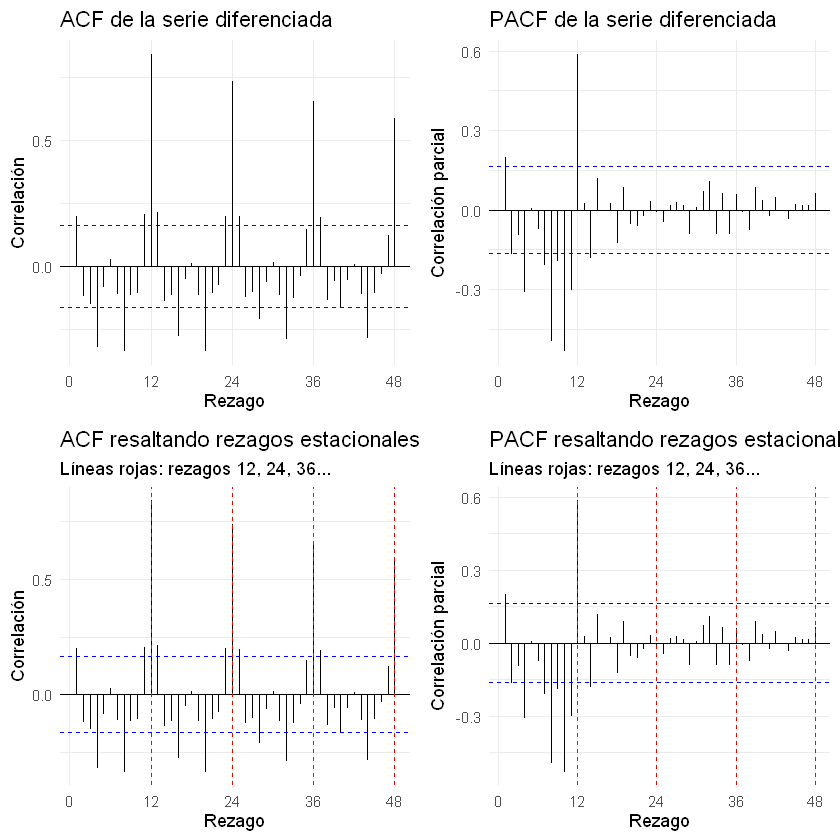

In [7]:
# Serie transformada y diferenciada (debe estar definida antes)
serie <- diff_log_ap

# Visualización comparativa
ggarrange(
  ggAcf(serie, lag.max = 48) +
    labs(title = "ACF de la serie diferenciada",
         x = "Rezago", y = "Correlación") +
    theme_minimal(),

  ggPacf(serie, lag.max = 48) +
    labs(title = "PACF de la serie diferenciada",
         x = "Rezago", y = "Correlación parcial") +
    theme_minimal(),

  ggAcf(serie, lag.max = 48) +
    geom_vline(xintercept = seq(12, 48, by = 12),
               color = "red", linetype = "dashed", linewidth = 0.5) +
    labs(title = "ACF resaltando rezagos estacionales",
         subtitle = "Líneas rojas: rezagos 12, 24, 36...",
         x = "Rezago", y = "Correlación") +
    theme_minimal(),

  ggPacf(serie, lag.max = 48) +
    geom_vline(xintercept = seq(12, 48, by = 12),
               color = "red", linetype = "dashed", linewidth = 0.5) +
    labs(title = "PACF resaltando rezagos estacionales",
         subtitle = "Líneas rojas: rezagos 12, 24, 36...",
         x = "Rezago", y = "Correlación parcial") +
    theme_minimal()
)


**🔍 Análisis de la imagen**

📈 **ACF (izquierda)**

- Se observa una **disminución lenta** de las barras, manteniéndose significativas en muchos rezagos.
- Este comportamiento es **típico de una serie no estacionaria**, en especial cuando hay **tendencia** o **componente estacional fuerte** no diferenciada.
- La caída no es abrupta, sino que las autocorrelaciones se **van atenuando de forma progresiva** → señal de memoria a largo plazo.

📈 **PACF (derecha)**

- Hay un **pico muy significativo en el primer rezago**, luego los valores bajan rápidamente (aunque algunos aún caen ligeramente fuera del intervalo de confianza).
- Este patrón es característico de un modelo **AR(1)** (aunque con posibilidad de orden mayor si los rezagos 2 o 3 también resultan significativos).

---

**🧠 Posible interpretación del modelo**

Con base en estos gráficos podríamos **proponer un modelo ARIMA tentativo**:

- **ACF que decrece lentamente** sugiere un componente **AR** en lugar de MA.
- **PACF con corte en rezago 1** sugiere un posible **AR(1)**.
- Si la serie fue previamente diferenciada (como `diff(log(AirPassengers))`), entonces estaríamos observando el comportamiento de una serie estacionaria → lo cual es coherente.

**Modelo tentativo:** `ARIMA(1,1,0)` o `ARIMA(1,1,0)(P,D,Q)[s]` si hay estacionalidad (que en `AirPassengers` suele estar en \( s = 12 \)).

---

<h3>✅ Cierre del taller</h3>

📌 Este taller ha permitido explorar paso a paso:

- La **estructura visual** de una serie no estacionaria.
- El **uso de pruebas formales** para detectar raíz unitaria.
- La **diferenciación logarítmica** como técnica para estabilizar varianza y eliminar tendencia.
- El uso de **ACF y PACF** para hacer una primera aproximación al modelo ARIMA más adecuado.

> En el siguiente bloque se construirá el modelo completo, incluyendo la validación de supuestos, estimación de parámetros y uso de `auto.arima()` para comparación.